# Problem 3

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [5]:
def loaddata(fname):
    data = np.loadtxt(fname,skiprows=1, delimiter=',')
    y = data[:,0]
    X = data[:,1:]
    nm = np.sqrt(np.sum(X * X, axis=1))
    X = X / nm[:,None]
    return y, X
trainY, trainX = loaddata('validation.csv')
testY, testX = loaddata('test.csv')

In [6]:
print trainX.shape, trainY.shape, testX.shape, testY.shape


(1000, 784) (1000,) (1000, 784) (1000,)


## 3.2

###3.2.1 SDG update rule

With point $(x^j, y^j)$ the update rule for w and w0 is the following:


if $y^j(w_{old}x^j+w0_{old})<1$

$\quad w0_{new}=w0_{old}- \eta (-y^j)$

$\quad$ for k=1:length(w)

$\qquad w_{k, new}=w_{k,old}-\eta \left(\displaystyle \frac{2w_{k,old}}{NC}-y^jx^j_{k}\right)$



###3.2.2


In [7]:
def StochGD(w0,w,x,y,eta, coef,N):
    # For hinge loss function l((x,y),w,w0)=max(0, 1-y(wx+w0))
    # Implement Stochastic Gradient Descent
    # using only one data point to update the gradient and therefore w
    
    if y*(x.dot(w)+w0)<1:# otherwise gradient is 0, so no update
        w0=w0+eta*y
        w=w-eta*(coef*w-y*x)
        
    return (w0,w)
    

###3.2.3

('norm of w', 17.300265865979682)


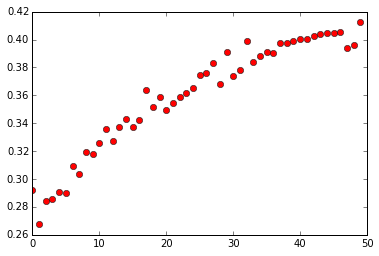

In [8]:
w0=0;
N,d=trainX.shape
w=np.zeros(d)
nloop=50
eta=0.1
C=1
coef=2.0/N/C
loss=np.zeros(nloop)
zer=np.zeros(N)
for i in range(nloop):
    for j in range(N):
        w0,w=StochGD(w0,w,trainX[j,:],trainY[j],eta,coef,N)
    M=1-trainY*(trainX.dot(w)+w0)
    sumL=np.sum(np.maximum(M,zer))
    loss[i]= 0.5*coef*np.linalg.norm(w, ord=2)**2+sumL*1.0/N  
    
plt.plot(loss,'ro')    
print('norm of w',np.linalg.norm(w, ord=2) )

###3.2.4


In [9]:
predictY = np.sign(testX.dot(w)+w0)
Yincorrect=predictY+testY
mask=Yincorrect==0
print('test',sum(mask)*1.0/N*100)
predictValidY = np.sign(trainX.dot(w)+w0)
Yincorrect=predictValidY+trainY
mask=Yincorrect==0
print('train',sum(mask)*1.0/N*100)

('test', 7.3999999999999995)
('train', 3.5000000000000004)


#### a) prediction error on test dataset is 7.4%

#### b) prediction error on training set is 3.5%

#### c) $||w||=17.3$

##3.2.5

('norm of w', 27.359271073497915)


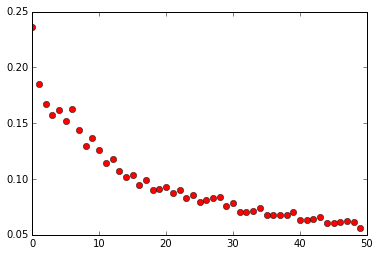

In [10]:
w0=0;
N,d=trainX.shape
w=np.zeros(d)
nloop=50
eta=0.1
C=100
coef=2.0/N/C
loss=np.zeros(nloop)
zer=np.zeros(N)
for i in range(nloop):
    for j in range(N):
        w0,w=StochGD(w0,w,trainX[j,:], trainY[j],eta, coef,N)  
    M=1-trainY*(trainX.dot(w)+w0)
    sumL=np.sum(np.maximum(M,zer))
    loss[i]= 0.5*coef*np.linalg.norm(w, ord=2)**2+sumL/N  
    
plt.plot(loss,'ro')    
print('norm of w',np.linalg.norm(w, ord=2) )

In [11]:
predictY = np.sign(testX.dot(w)+w0)
Yincorrect=predictY+testY
mask=Yincorrect==0
print('test',sum(mask)*1.0/N*100)
predictValidY = np.sign(trainX.dot(w)+w0)
Yincorrect=predictValidY+trainY
mask=Yincorrect==0
print('train',sum(mask)*1.0/N*100)

('test', 6.2000000000000002)
('train', 1.3)


#### a) prediction error on test dataset is 6.2%

#### b) prediction error on training set is 1.3%

#### c) $||w||=27.36$

## 3.2.6

By increasing $C$ we are decreasing the penalty term, so $w$ can have more non-zero elements which can lead to a better classification. As we see when $C=1$, $\lambda=\frac{1}{NC}$ is bigger than $\lambda$ for $C=100$. We get $||w||=17.03$ in the first case and $||w||=27.36$ in the second case which is consistent with what we would expect to happen. 

Making the $\lambda$ coefficient big we try to make the components of $w$ be 0  which increases the error, however letting the $\lambda$ be bigger makes w to have more non-zero elements, so smaller error.

Thus, when we increase C, we increase variance and decrease the bias. 